In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the data
data = pd.read_csv(r'C:\Users\qazia5\projects\SET\data\raw\Demand_data.label\Demand_data\raw_data_H1_m1.P.csv')

data.head()


,timestamp,vL1_Alarm,vL1_Current,vL1_Energy,vL1_Frequency,vL1_Power,vL1_PowerFactor,vL1_Voltage,Wh_diff,(Wh/W)_min,raw_cum_min,cum_(Wh/W)_min
0,19/03/2024 11:21,0,0,266,49900,0,0,223200,0,0.0,0.0,0.0
1,19/03/2024 11:23,0,0,266,50000,0,0,223300,0,0.0,0.0,0.0
2,19/03/2024 11:24,0,0,266,49900,0,0,223400,0,0.0,0.0,0.0
3,19/03/2024 11:26,0,0,266,50000,0,0,223400,0,0.0,0.0,0.0
4,19/03/2024 11:27,0,0,266,50000,0,0,223500,0,0.0,0.0,0.0


In [2]:
data.isnull().sum()

timestamp          0
vL1_Alarm          0
vL1_Current        0
vL1_Energy         0
vL1_Frequency      0
vL1_Power          0
vL1_PowerFactor    0
vL1_Voltage        0
Wh_diff            0
(Wh/W)_min         0
raw_cum_min        0
cum_(Wh/W)_min     0
dtype: int64

In [3]:
data.isna().sum()

timestamp          0
vL1_Alarm          0
vL1_Current        0
vL1_Energy         0
vL1_Frequency      0
vL1_Power          0
vL1_PowerFactor    0
vL1_Voltage        0
Wh_diff            0
(Wh/W)_min         0
raw_cum_min        0
cum_(Wh/W)_min     0
dtype: int64

In [7]:
import os 

processed_File = []
path = os.path.join(r'C:\Users\qazia5\projects\SET\data\raw\Demand_data.label\Demand_data')

for file in os.listdir(path):
    if file.endswith(".csv"):
        processed_File.append(file)
        df = pd.read_csv(os.path.join(path, file))
        print(f"File: {file}")
        
        
        print(df.isna().sum())
        print("\n")
        
        

File: raw_data_H10_m1.P.csv
timestamp          0
vL1_Alarm          0
vL1_Current        0
vL1_Energy         0
vL1_Frequency      0
vL1_Power          0
vL1_PowerFactor    0
vL1_Voltage        0
Wh_diff            0
(Wh/W)_min         0
raw_cum_min        0
cum_(Wh/W)_min     0
dtype: int64


File: raw_data_H10_m2.I.csv
timestamp          0
vL1_Alarm          0
vL1_Current        0
vL1_Energy         0
vL1_Frequency      0
vL1_Power          0
vL1_PowerFactor    0
vL1_Voltage        0
Wh_diff            0
(Wh/W)_min         0
raw_cum_min        0
cum_(Wh/W)_min     0
dtype: int64


File: raw_data_H10_m3.L.csv
timestamp          0
vL1_Alarm          0
vL1_Current        0
vL1_Energy         0
vL1_Frequency      0
vL1_Power          0
vL1_PowerFactor    0
vL1_Voltage        0
Wh_diff            0
(Wh/W)_min         0
raw_cum_min        0
cum_(Wh/W)_min     0
dtype: int64


File: raw_data_H11_m1.P.csv
timestamp          0
vL1_Alarm          0
vL1_Current        0
vL1_Energy         0
vL1

In [11]:
# Convert the timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M')

# List the datatime periods
data['timestamp'].dt.date.unique()

# check for missing timestamp
print(data['timestamp'])

0       2024-03-19 11:21:00
1       2024-03-19 11:23:00
2       2024-03-19 11:24:00
3       2024-03-19 11:26:00
4       2024-03-19 11:27:00
                ...        
15726   2024-08-22 07:24:00
15727   2024-08-22 07:26:00
15728   2024-08-22 08:17:00
15729   2024-08-22 11:21:00
15730   2024-08-24 09:23:00
Name: timestamp, Length: 15731, dtype: datetime64[ns]


In [33]:
# Convert the timestamp to datetime format
data['timestamp'] = pd.to_datetime(data['timestamp'], format='%d/%m/%Y %H:%M')

# Extract the day and hour from the timestamp
data['Date'] = data['timestamp'].dt.date  # Extract the date
data['Hour'] = data['timestamp'].dt.hour  # Extract the hour

# Group by both Date and Hour, and calculate the mean of vL1_Power
daily_hourly_mean_power = data.groupby(['Date', 'Hour'])['vL1_Power'].mean().unstack()

# Print the result
daily_hourly_mean_power

Hour,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
Date,,,,,,,,,,,,,,,,,,,,,
2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.666667,...,5.0,NaN,NaN,NaN,NaN,2.350034e+08,NaN,NaN,NaN,NaN
2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.00,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-23,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,6.250000e-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-16,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.48,4.8,5.000000e+00,5.0,5.0,NaN,NaN
2024-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.823529,...,NaN,NaN,0.0,0.00,2.5,5.000000e+00,NaN,NaN,NaN,NaN
2024-08-18,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,4.736842,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
# daily_hourly_mean_power.set_index('Date', inplace=True)

# Create a continuous time range based on the minimum and maximum timestamps in your data
complete_range = pd.date_range(start=daily_hourly_mean_power.index.min(), end=daily_hourly_mean_power.index.max(), freq='D')  # 'D' for daily frequency, can be 'T' for minutes

# Reindex the data to the full time range, introducing NaN for missing timestamps
data_reindexed = daily_hourly_mean_power.reindex(complete_range)

# Print the result
data_reindexed

Hour,2,3,4,5,6,7,8,9,10,11,...,14,15,16,17,18,19,20,21,22,23
2024-03-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.666667,...,5.0,NaN,NaN,NaN,NaN,2.350034e+08,NaN,NaN,NaN,NaN
2024-03-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,...,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-23,NaN,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,0.0,6.250000e-01,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-22,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-08-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


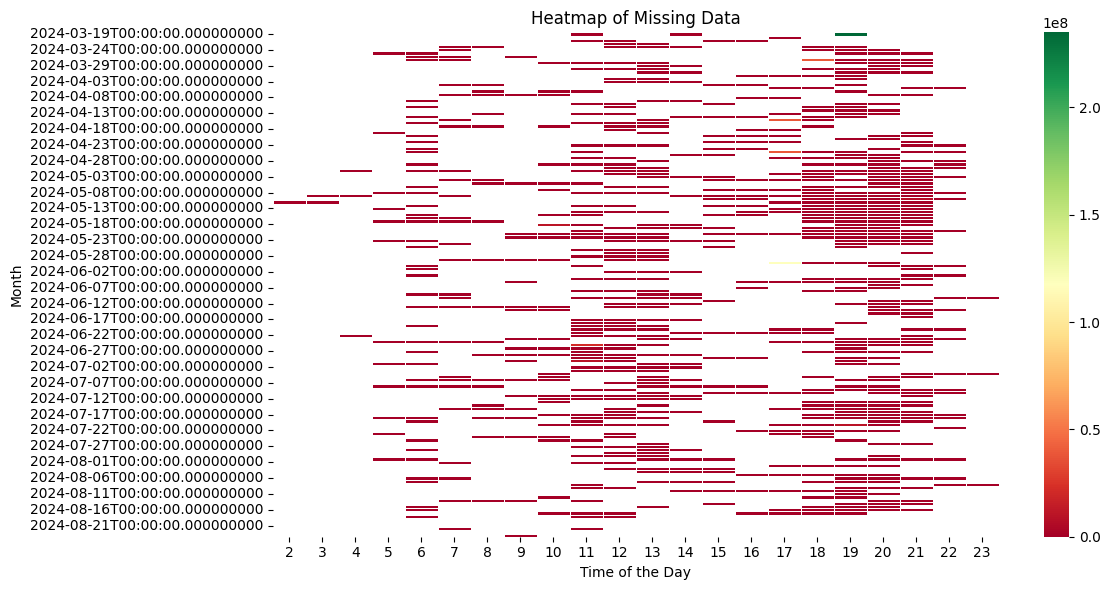

In [35]:
# Generate heatmap for missing data in power columns
plt.figure(figsize=(12, 6))
sns.heatmap(data_reindexed, cbar=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Heatmap of Missing Data')
plt.ylabel('Month')
plt.xlabel('Time of the Day')
plt.tight_layout()

plt.show()

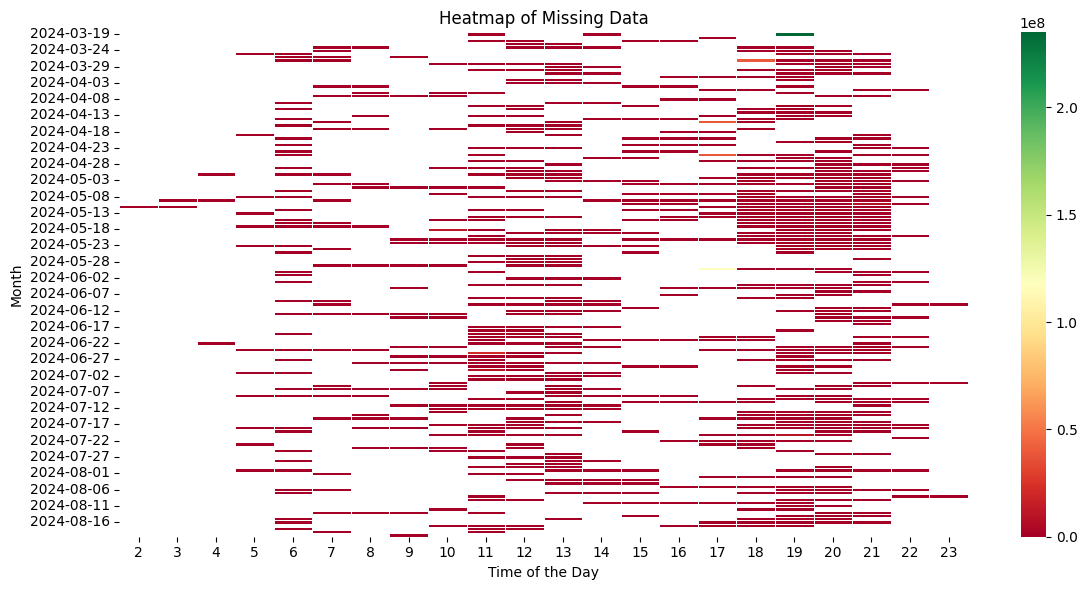

In [27]:
# Generate heatmap for missing data in power columns
plt.figure(figsize=(12, 6))
sns.heatmap(daily_hourly_mean_power, cbar=True, cmap='RdYlGn', linewidths=0.5)
plt.title('Heatmap of Missing Data')
plt.xlabel('Time of the Day')
plt.ylabel('Month')
plt.tight_layout()

plt.show()

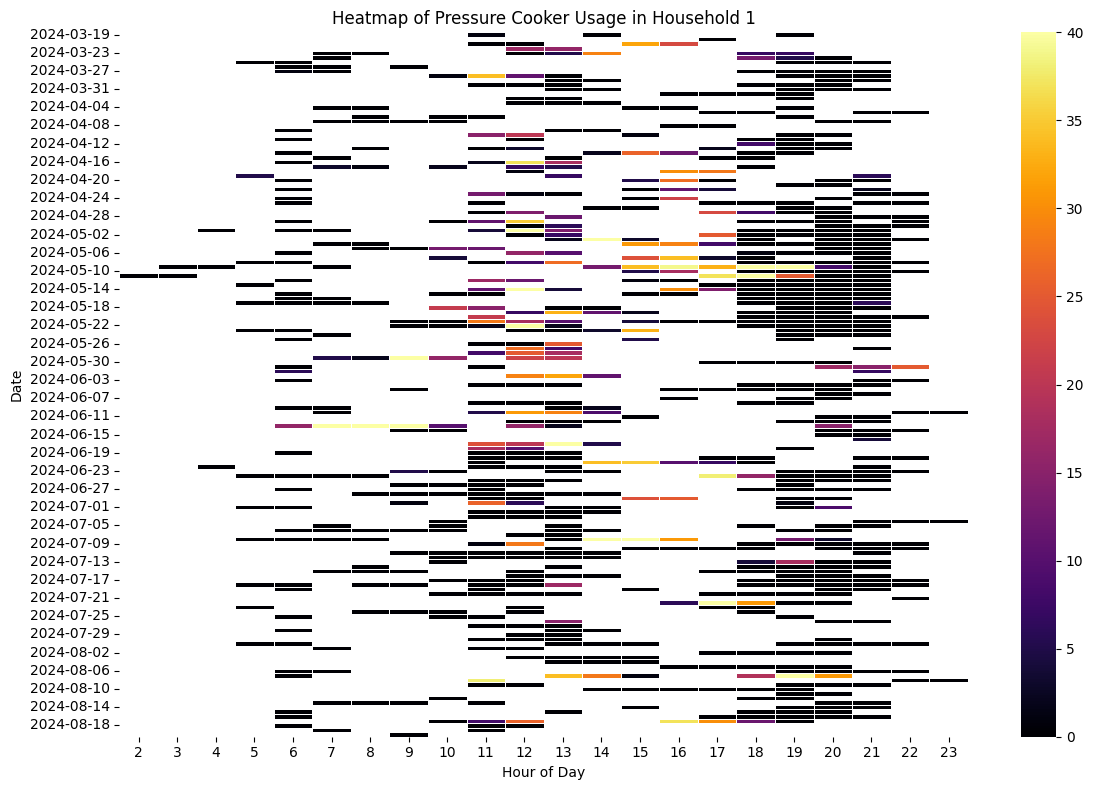

In [28]:
# Create a boolean mask for missing values in vL1_Power (consider 0 as missing if needed)
data['is_missing'] = (data['vL1_Power'] == 0) | (data['vL1_Power'].isna())

# Pivot the data to create a matrix where each row is a Date and each column is an Hour
missing_data_heatmap = data.pivot_table(index='Date', columns='Hour', values='is_missing', aggfunc='sum')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data_heatmap, cmap="inferno", cbar=True, linewidths=0.5)

# Set labels and title
plt.title('Heatmap of Pressure Cooker Usage in Household 1')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()

# Show the plot
plt.show()


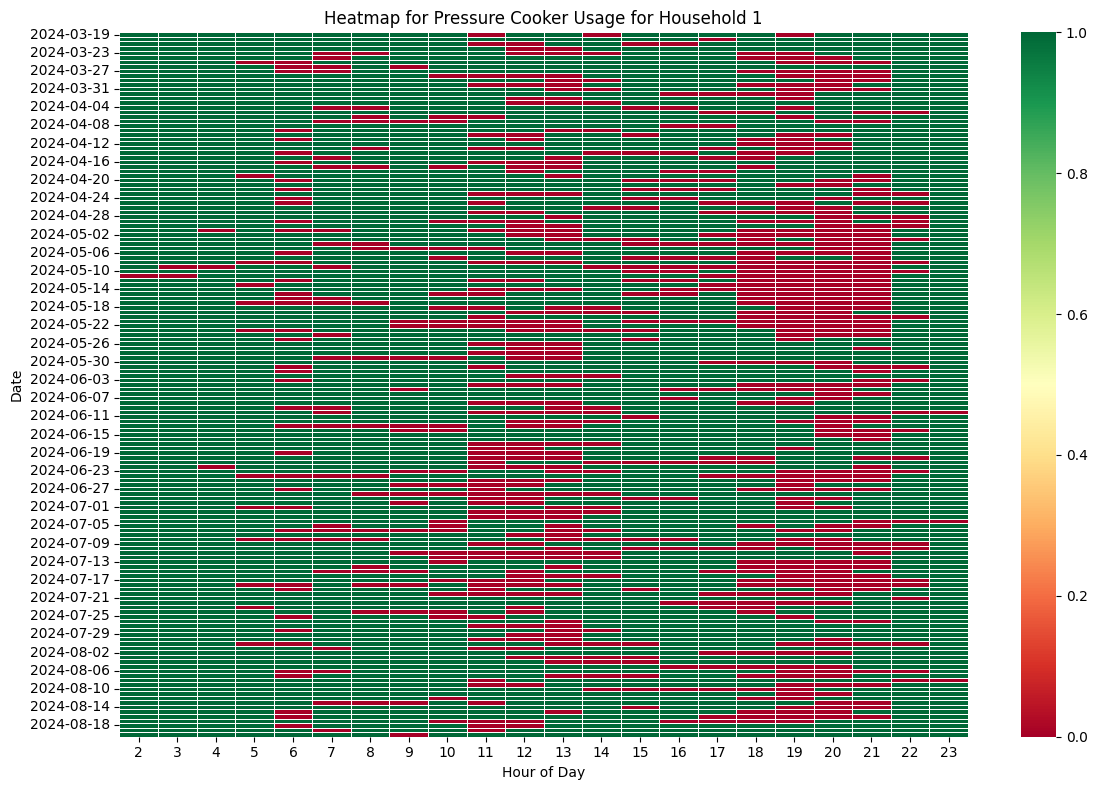

In [29]:
# Create a boolean mask for missing values in vL1_Power (consider 0 as missing if needed)
# missing_data_mask = (daily_hourly_mean_power == 0) | (daily_hourly_mean_power.isna())
missing_data_mask = (daily_hourly_mean_power.isna())

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(missing_data_mask, cmap="RdYlGn", cbar=True, linewidths=0.5)

# Set labels and title
plt.title('Heatmap for Pressure Cooker Usage for Household 1')
plt.xlabel('Hour of Day')
plt.ylabel('Date')
plt.tight_layout()

# Show the plot
plt.show()

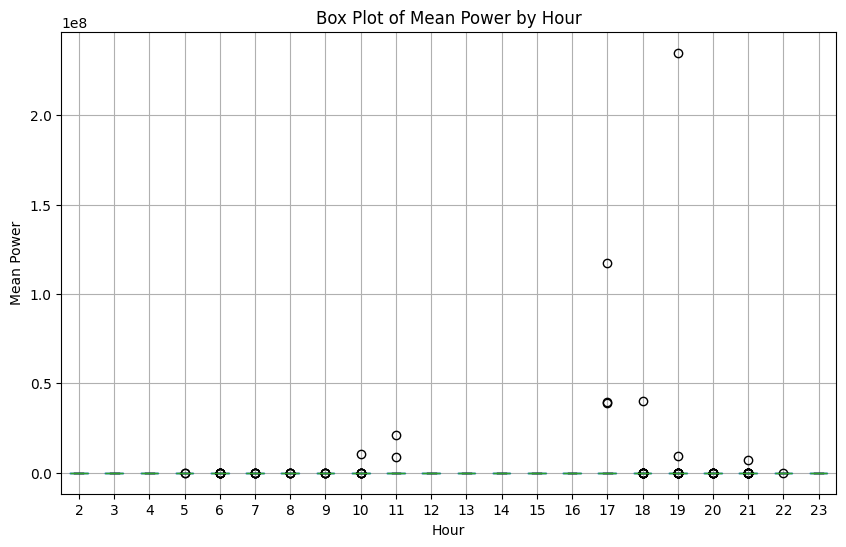

In [30]:
# Assuming daily_hourly_mean_power is already calculated
# Here we will create a box plot of the power data for all hours.

# Plot a box plot for all hourly columns in daily_hourly_mean_power
plt.figure(figsize=(10, 6))
daily_hourly_mean_power.boxplot()

# Add labels and title
plt.title('Box Plot of Mean Power by Hour')
plt.xlabel('Hour')
plt.ylabel('Mean Power')

# Show the plot
plt.show()


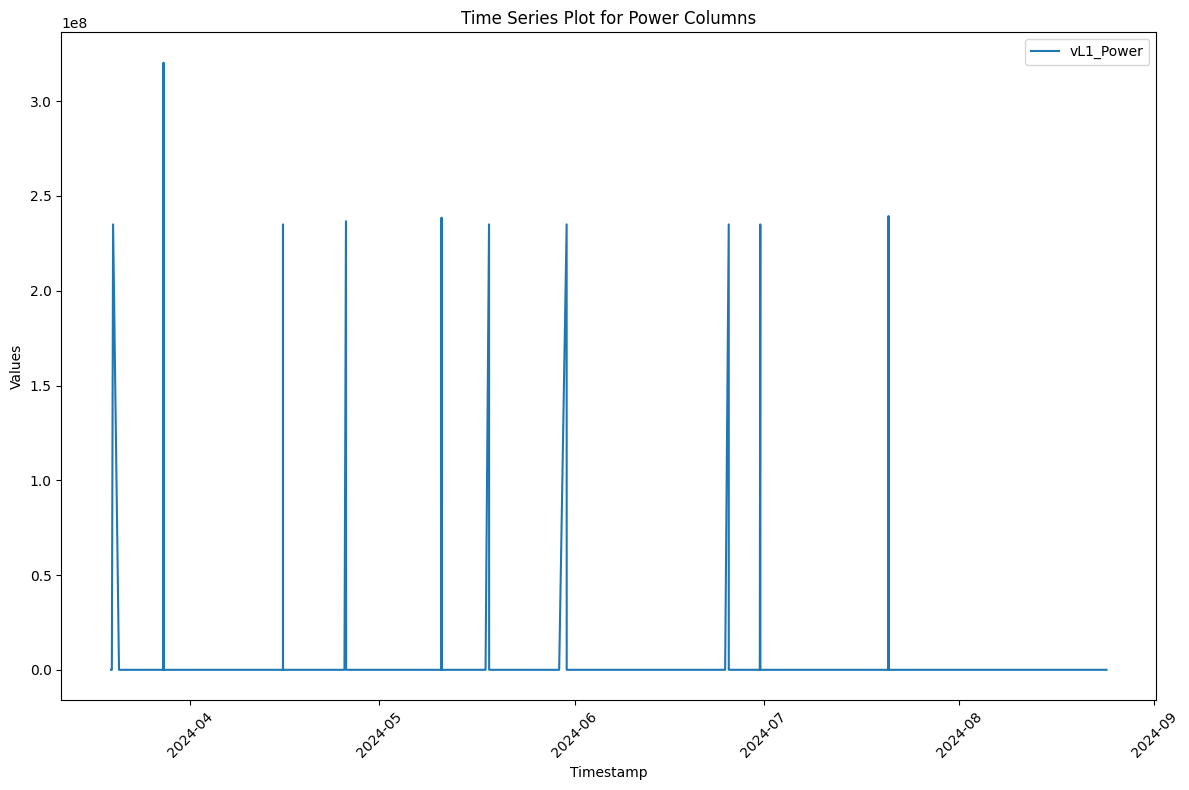

In [31]:
# Generate time series plots for power columns
plt.figure(figsize=(12, 8))

plt.plot(data['timestamp'], data['vL1_Power'], label='vL1_Power')

plt.title('Time Series Plot for Power Columns')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

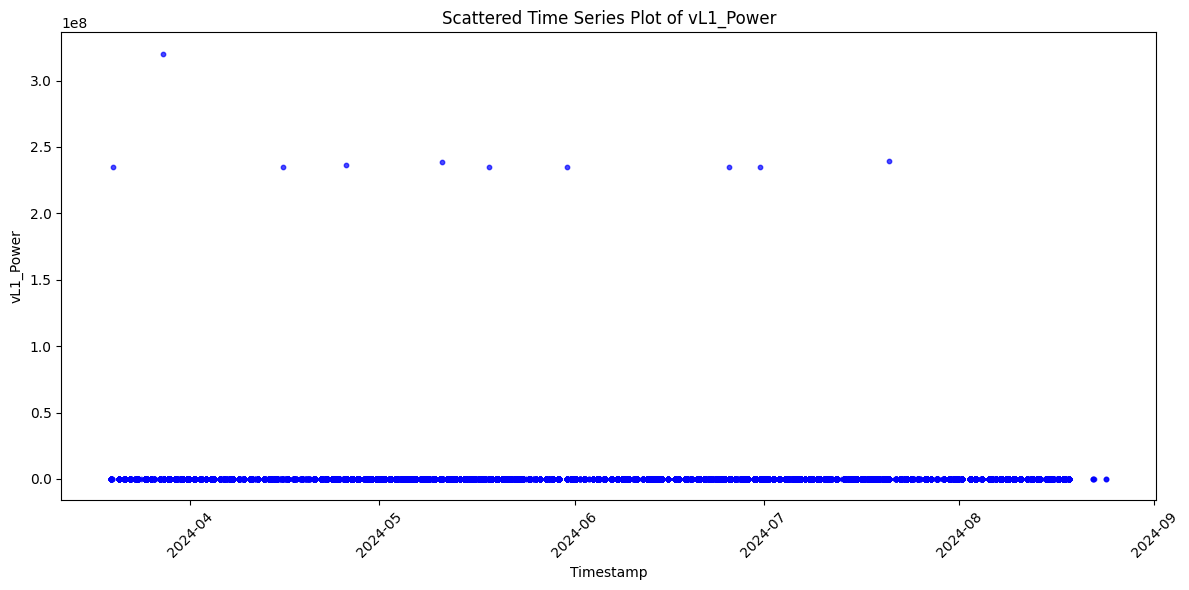

In [32]:
# Scattered time series plot
plt.figure(figsize=(12, 6))
plt.scatter(data['timestamp'], data['vL1_Power'], c='blue', marker='o', s=10, alpha=0.7)
plt.title('Scattered Time Series Plot of vL1_Power')
plt.xlabel('Timestamp')
plt.ylabel('vL1_Power')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()